In [2]:
import numpy as np
import pandas as pd 
import missingno as msno
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


####  - <a href="#C3">Aligner les données dans le dataframe training et testing</a>

In [3]:
# Importation des données du traning set
data_train = pd.read_csv('application_train.csv')
print('Les dimensions du data training : ', data_train.shape)
data_train.head()

Les dimensions du data training :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Importation des données du testing set
data_test = pd.read_csv('application_test.csv')
print('Les dimensions du data testing : ',data_test.shape)
data_test.head()

Les dimensions du data testing :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Examiner la distribution de la colonne cible

L'objectif est ce qu'on nous demande de prédire : soit un 0 pour le prêt remboursé à temps, soit un 1 indiquant que le client a eu des difficultés de paiement. Nous pouvons d’abord examiner le nombre de prêts entrant dans chaque catégorie.

In [23]:
data_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

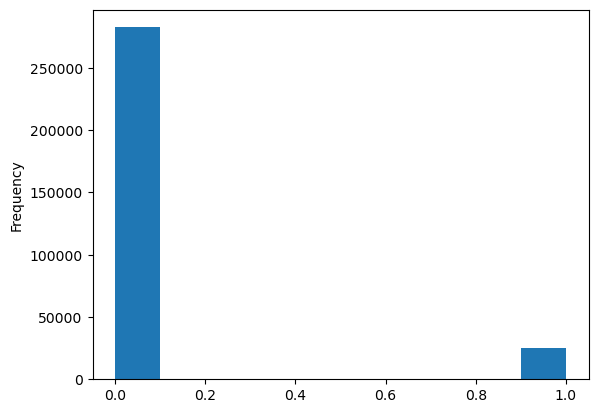

In [24]:
data_train['TARGET'].plot.hist();

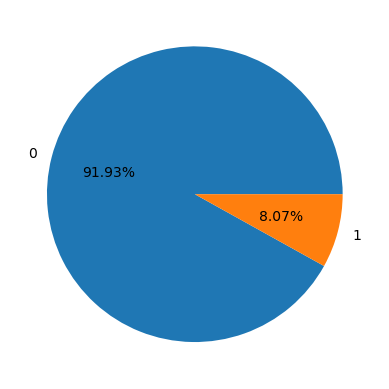

In [8]:
tar = (data_train['TARGET'].value_counts())/len(data_train)
plt.pie(tar,labels=tar.index,autopct='%.2f%%')# Diagramme en secteurs
plt.show()

### Les valeurs manquantes

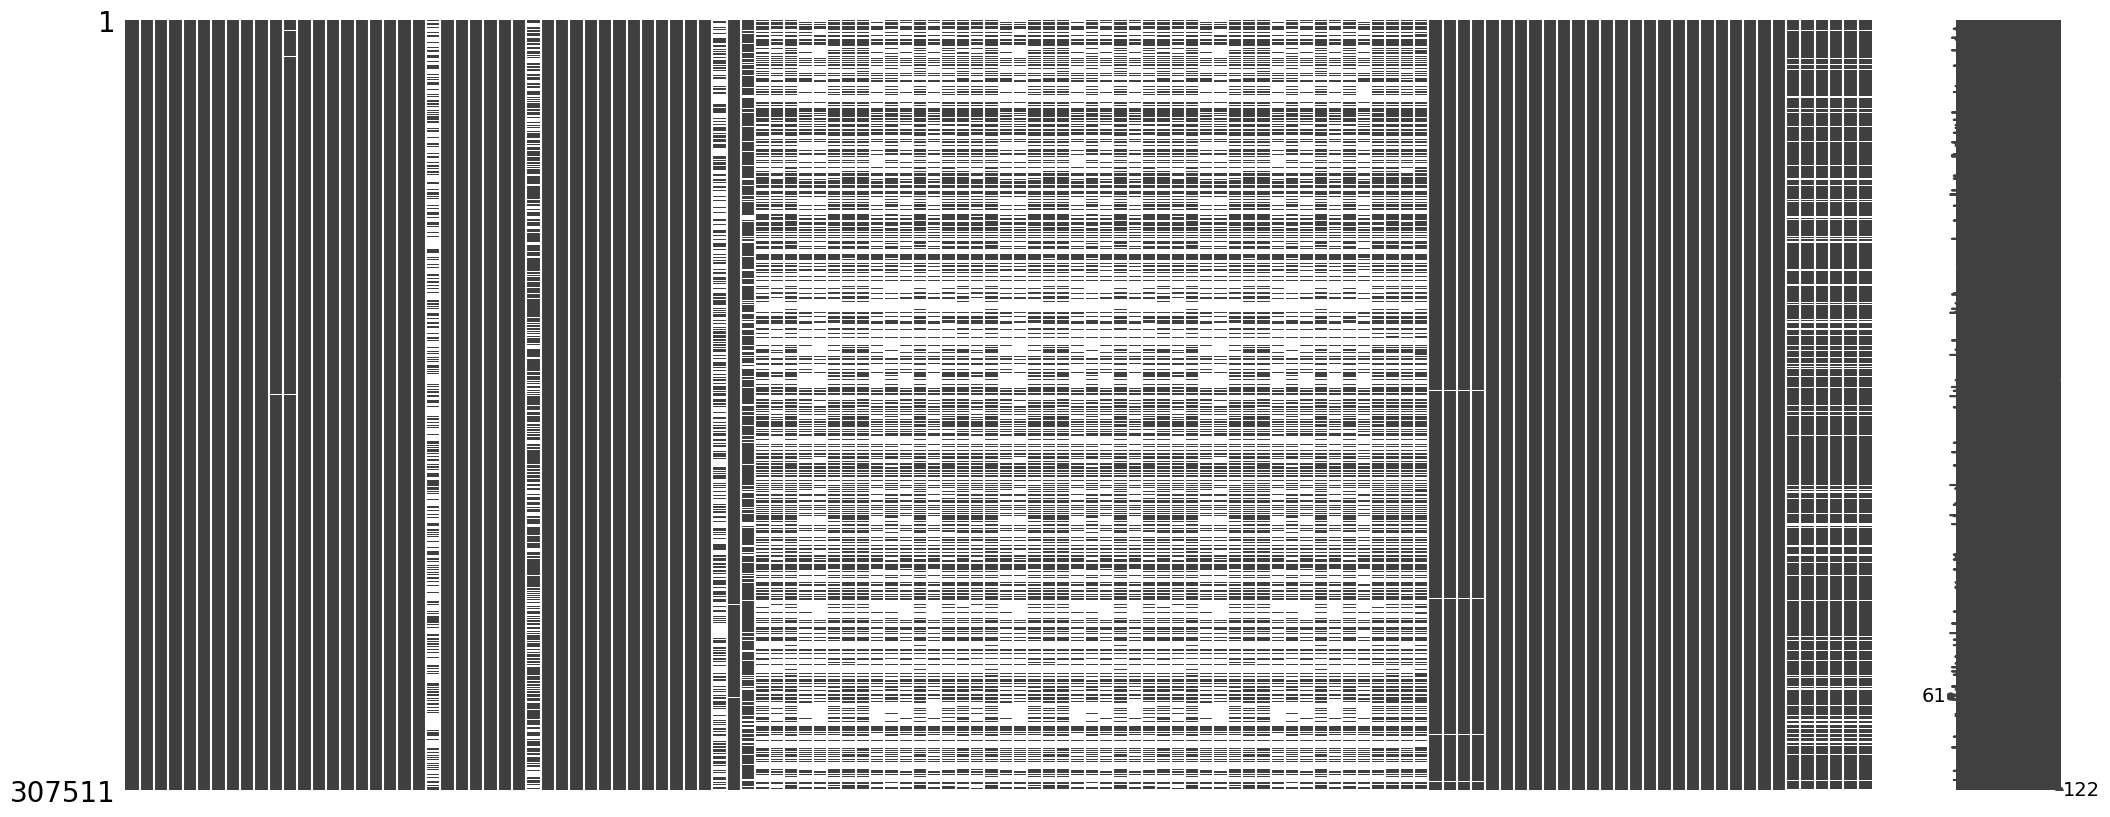

In [9]:
msno.matrix(data_train);

In [26]:
# Création d'un tableau des valeurs manquantes par colonnes
miss = data_train.isnull().sum()
miss_pourcent = (100 * data_train.isnull().sum() / len(data_train)).round(2)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MODE,213514,69.43
NONLIVINGAPARTMENTS_AVG,213514,69.43
...,...,...
NAME_FAMILY_STATUS,0,0.00
NAME_EDUCATION_TYPE,0,0.00
NAME_INCOME_TYPE,0,0.00
AMT_ANNUITY,12,0.00


In [27]:
Tab_Col_Manq = TableManq.loc[TableManq['Nbr_Val_Manq'] > 0 ]
print('Le nombre de colonnes comportants des valeurs manquantes est de : '+ str(Tab_Col_Manq.shape[0]))
Tab_Col_Manq

Le nombre de colonnes comportants des valeurs manquantes est de : 67


,Nbr_Val_Manq,%Val_manq
AMT_ANNUITY,12,0.00
AMT_GOODS_PRICE,278,0.09
NAME_TYPE_SUITE,1292,0.42
OWN_CAR_AGE,202929,65.99
OCCUPATION_TYPE,96391,31.35
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50


In [28]:
Tab_Col_Plein = TableManq.loc[TableManq['Nbr_Val_Manq'] == 0 ]
print('Le nombre de colonnes ayant 0 (zero) valeur manquante est de : '+ str(Tab_Col_Plein.shape[0]))
Tab_Col_Plein.head(5)

Le nombre de colonnes ayant 0 (zero) valeur manquante est de : 55


,Nbr_Val_Manq,%Val_manq
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0


### Encodage d’étiquettes et encodage One-Hot

In [29]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data_train:
    if data_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(data_train[col])
            # Transform both training and testing data
            data_train[col] = le.transform(data_train[col])
            data_test[col] = le.transform(data_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [30]:
# encodage à chaud des variables catégorielles
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

print("Les dimensions des features training: ", data_train.shape)
print('Les dimensions des features testing ', data_test.shape)

Les dimensions des features training:  (307511, 243)
Les dimensions des features testing  (48744, 239)


##   <a name="C3">Aligner les données dans le dataframe training et testing</a>

In [31]:
train_labels = data_train['TARGET']

# Alignez les données de formation et de test, ne conservez que les colonnes présentes dans les deux dataframes
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

# Ajoutez la cible
data_train['TARGET'] = train_labels
data = data_train
data_test.to_csv('data_test.csv')
data.to_csv('data.csv') 
print("Les dimensions des features training: ", data_train.shape)
print('Les dimensions des features testing ', data_test.shape)

Les dimensions des features training:  (307511, 240)
Les dimensions des features testing  (48744, 239)


In [14]:
(data_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Ces âges semblent raisonnables. Il n’y a pas de valeurs aberrantes pour l’âge, que ce soit dans le haut ou le bas

In [19]:
data_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

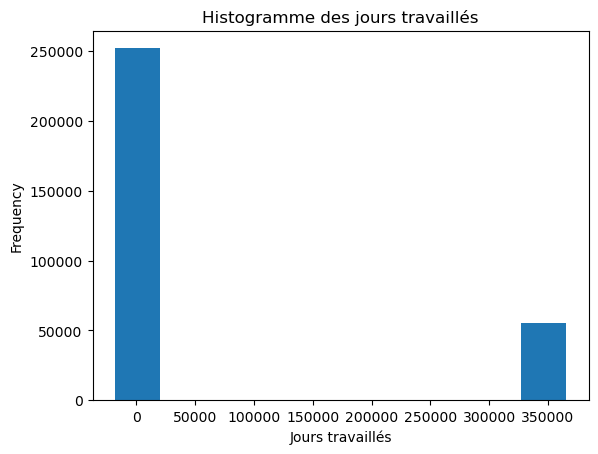

In [21]:
data_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours travaillés');
plt.xlabel('Jours travaillés');

In [24]:
anom = data_train[data_train['DAYS_EMPLOYED'] == 365243]
non_anom = data_train[data_train['DAYS_EMPLOYED'] != 365243]
print('Le défaut de non-anomalies on %0.2f%% de prêts' % (100 * non_anom['TARGET'].mean()))
print('Les anomalies par défaut %0.2f%% de prêts' % (100 * anom['TARGET'].mean()))
print('Il y a %d jours de travail anormaux' % len(anom))

Le défaut de non-anomalies on 8.66% de prêts
Les anomalies par défaut 5.40% de prêts
Il y a 55374 jours de travail anormaux


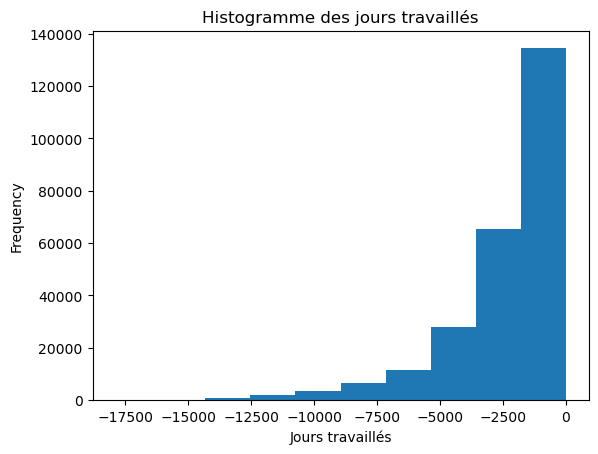

In [26]:
# Create an anomalous flag column
data_train['DAYS_EMPLOYED_ANOM'] = data_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
data_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

data_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogramme des jours travaillés');
plt.xlabel('Jours travaillés');

La distribution semble être beaucoup plus conforme à ce à quoi nous nous attendions, et nous avons également créé une nouvelle colonne pour indiquer au modèle que ces valeurs étaient à l'origine anormales (car nous devrons remplir les nans avec une valeur, probablement la médiane). de la colonne). Les autres colonnes avec DAYS dans le dataframe semblent correspondre à ce à quoi nous nous attendons, sans valeurs aberrantes évidentes.

In [30]:
data_test['DAYS_EMPLOYED_ANOM'] = data_test["DAYS_EMPLOYED"] == 365243
data_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Il y a %d anomalies dans les données de test sur %d entries' % (data_test["DAYS_EMPLOYED_ANOM"].sum(), len(data_test)))

Il y a 0 anomalies dans les données de test sur 48744 entries


### Corrélations

Maintenant que nous avons traité les variables catégorielles et les valeurs aberrantes, continuons avec l'EDA. Une façon d’essayer de comprendre les données consiste à rechercher des corrélations entre les caractéristiques et la cible. Nous pouvons calculer le coefficient de corrélation de Pearson entre chaque variable et la cible en utilisant la méthode dataframe .corr()

Le coefficient de corrélation n'est pas la meilleure méthode pour représenter la « pertinence » d'une caractéristique, mais il nous donne une idée des relations possibles au sein des données. Voici quelques interprétations générales de la valeur absolue du coefficient de corrélation :

- 00-.19 « très faible »

- 20-.39 «faible»

- 40-.59 « modéré »

- 60-.79 « fort »

- 80-1.0 "très fort


In [31]:
# Trouver des corrélations avec la cible et trier
correlations = data_train.corr()['TARGET'].sort_values()

# Display correlations
print('Corrélations les plus positives:\n', correlations.tail(10))
print('\nCorrélations les plus négatives:\n', correlations.head(10))

Corrélations les plus positives:
 REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Corrélations les plus négatives:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


Jetons un coup d'œil à certaines des corrélations les plus significatives : DAYS_BIRTH est la corrélation la plus positive. (sauf pour TARGET car la corrélation d'une variable avec elle-même est toujours de 1 !) En regardant la documentation, DAYS_BIRTH est l'âge en jours du client au moment du prêt en jours négatifs (quelle qu'en soit la raison !). La corrélation est positive, mais la valeur de cette caractéristique est en réalité négative, ce qui signifie qu'à mesure que le client vieillit, il est moins susceptible de faire défaut sur son prêt (c'est-à-dire que l'objectif == 0). C'est un peu déroutant, nous prendrons donc la valeur absolue de la caractéristique et la corrélation sera alors négative.

#### Effet de l'âge sur le remboursement

In [15]:
data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])
data_train['DAYS_BIRTH'].corr(data_train['TARGET'])

-0.07823930830982737

À mesure que le client vieillit, il existe une relation linéaire négative avec la cible, ce qui signifie qu’à mesure que les clients vieillissent, ils ont tendance à rembourser leurs prêts à temps.

Commençons par examiner cette variable. Tout d’abord, nous pouvons faire un histogramme de l’âge. Nous mettrons l'axe des x en années pour rendre l'intrigue un peu plus compréhensible.

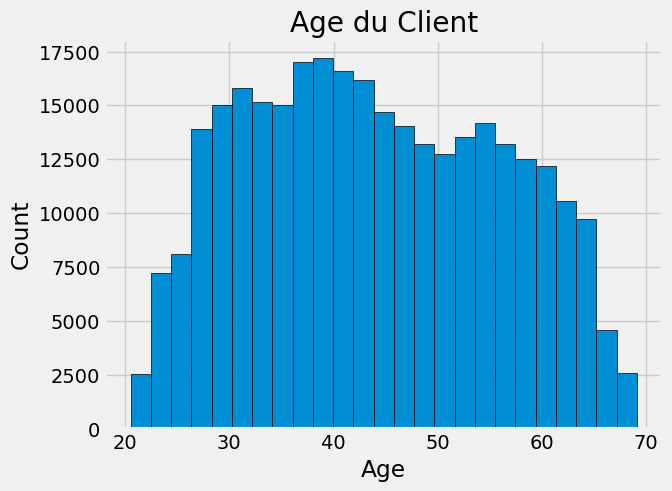

In [37]:
# Définir le style des tracés
plt.style.use('fivethirtyeight')

# Tracer la répartition des âges en années
plt.hist(data_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age du Client'); plt.xlabel('Age'); plt.ylabel('Count');

En elle-même, la répartition par âge ne nous dit pas grand-chose, si ce n’est qu’il n’y a pas de valeurs aberrantes puisque tous les âges sont raisonnables. Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite créer un tracé d'estimation de la densité du noyau (KDE) coloré par la valeur de la cible. Un tracé d'estimation de densité de noyau montre la distribution d'une variable unique et peut être considéré comme un histogramme lissé (il est créé en calculant un noyau, généralement un gaussien, à chaque point de données, puis en faisant la moyenne de tous les noyaux individuels pour développer un seul noyau lisse). courbe). Nous utiliserons le kdeplot seaborn pour ce graphique.

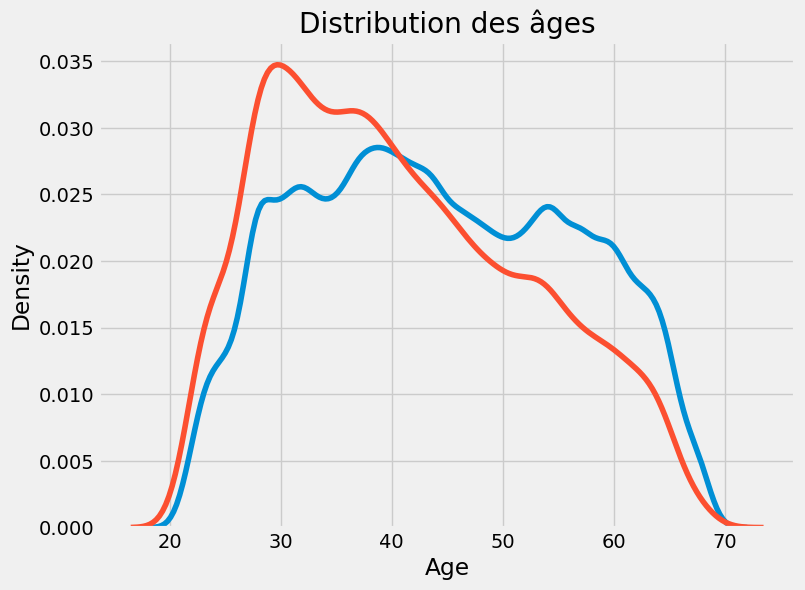

In [38]:
plt.figure(figsize = (8, 6))

# KDE plot of loans that were repaid on time
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age'); plt.ylabel('Density'); plt.title('Distribution des âges');

La courbe cible == 1 s’incline vers l’extrémité la plus jeune de la fourchette. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible. Examinons cette relation sous un autre angle : non-remboursement moyen des prêts par tranche d'âge.

Pour réaliser ce graphique suivant, nous avons d’abord découpé la catégorie d’âge en tranches de 5 ans chacune. Ensuite, pour chaque case, nous calculons la valeur moyenne de la cible, qui nous indique le ratio de prêts non remboursés dans chaque tranche d'âge.

In [42]:
# Informations sur l'âge dans une dataframe distincte
age_data = data_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Classer les données d'âge
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [43]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,-8532.795625,23.377522
"(25.0, 30.0]",0.111436,-10155.219250,27.822518
"(30.0, 35.0]",0.102814,-11854.848377,32.479037
"(35.0, 40.0]",0.089414,-13707.908253,37.555913
"(40.0, 45.0]",0.078491,-15497.661233,42.459346
"(45.0, 50.0]",0.074171,-17323.900441,47.462741
"(50.0, 55.0]",0.066968,-19196.494791,52.593136
"(55.0, 60.0]",0.055314,-20984.262742,57.491131
"(60.0, 65.0]",0.052737,-22780.547460,62.412459


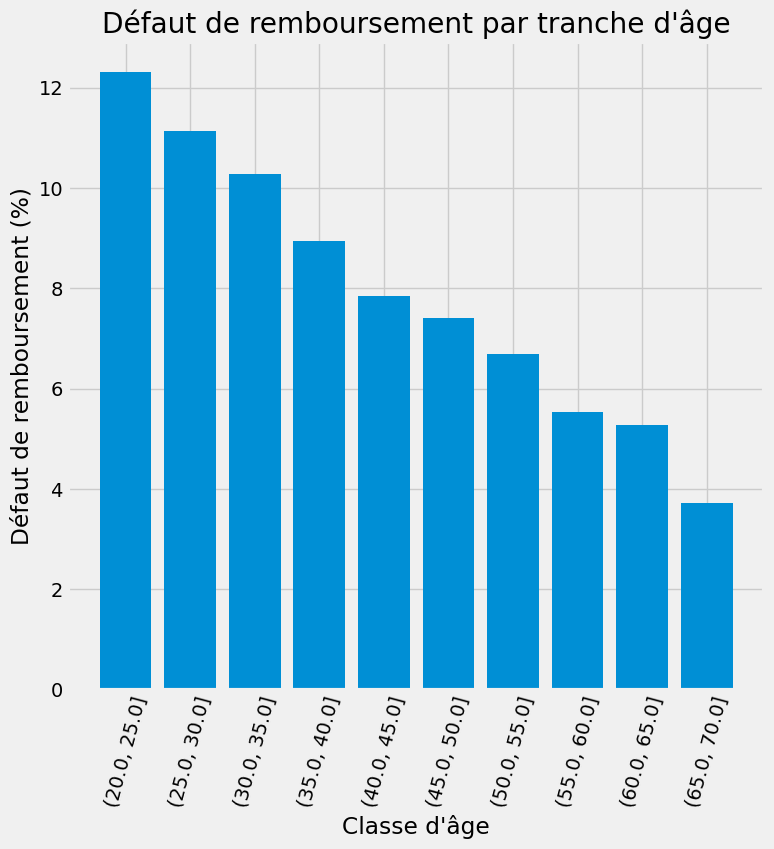

In [45]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel("Classe d'âge"); plt.ylabel('Défaut de remboursement (%)')
plt.title("Défaut de remboursement par tranche d'âge");

Il y a une tendance claire : les demandeurs les plus jeunes sont plus susceptibles de ne pas rembourser leur prêt ! Le taux de non-remboursement est supérieur à 10 % pour les trois tranches d'âge les plus jeunes et inférieur à 5 % pour la tranche d'âge la plus âgée.

#### Sources extérieures

Les 3 variables présentant les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces fonctionnalités représentent un « score normalisé provenant d'une source de données externe ». Je ne suis pas sûr de ce que cela signifie exactement, mais il peut s'agir d'une sorte de notation de crédit cumulative établie à l'aide de nombreuses sources de données.

Premièrement, nous pouvons montrer les corrélations des caractéristiques EXT_SOURCE avec la cible et entre elles.

In [47]:
# Extrayez les variables EXT_SOURCE et affichez les corrélations
ext_data = data_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


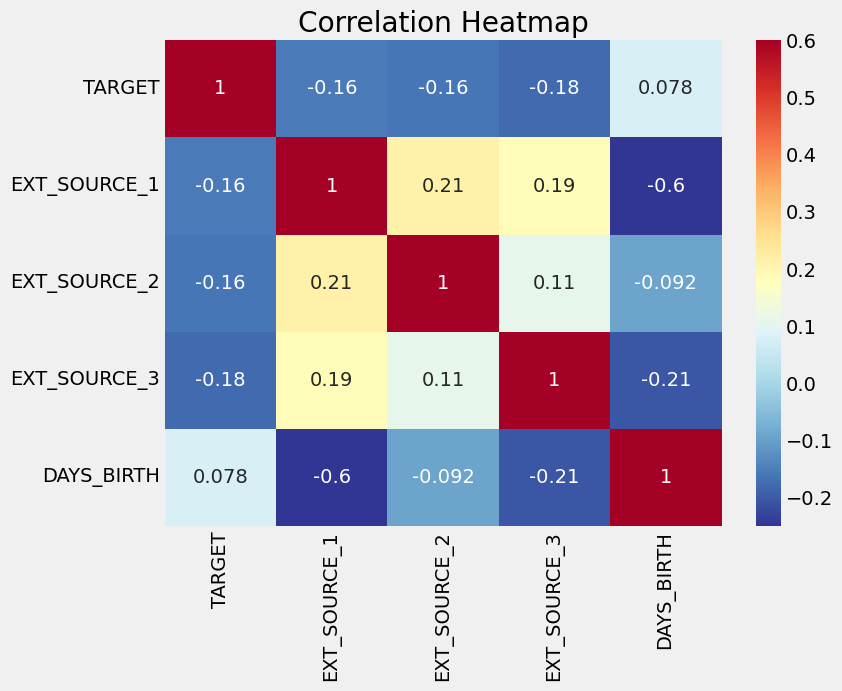

In [49]:
# Heatmap of correlations
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique qu'à mesure que la valeur de EXT_SOURCE augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1, ce qui indique que l'un des facteurs de ce score est peut-être l'âge du client.

Nous pouvons ensuite examiner la distribution de chacune de ces caractéristiques colorées par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la cible.

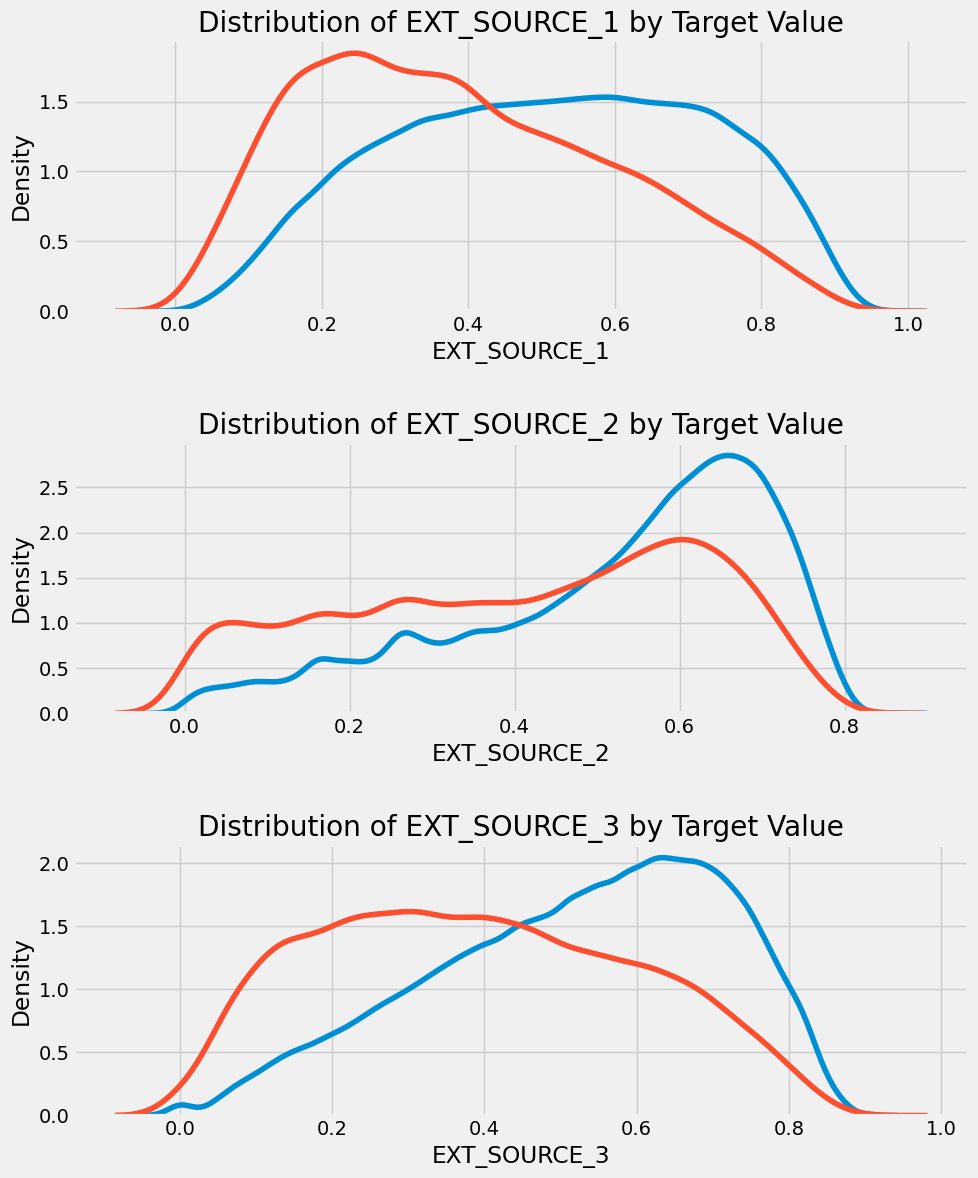

In [50]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    #prêts remboursés (orange)
    sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, source], label = 'target == 0')
    # prêts non remboursés (bleu)
    sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a un certain lien avec la probabilité qu'un demandeur rembourse un prêt. La relation n’est pas très forte (en fait, elles sont toutes considérées comme très faibles, mais ces variables seront tout de même utiles à un modèle d’apprentissage automatique pour prédire si un demandeur remboursera ou non un prêt à temps.

#### Pairs Plot

En guise de tracé exploratoire final, nous pouvons créer un tracé de paires des variables EXT_SOURCE et de la variable DAYS_BIRTH. Le diagramme de paires est un excellent outil d'exploration car il nous permet de voir les relations entre plusieurs paires de variables ainsi que les distributions de variables uniques. Ici, nous utilisons la bibliothèque de visualisation Seaborn et la fonction PairGrid pour créer un diagramme de paires avec des nuages ​​de points sur le triangle supérieur, des histogrammes sur la diagonale et des tracés de densité de noyau 2D et des coefficients de corrélation sur le triangle inférieur.

Si vous ne comprenez pas ce code, ce n'est pas grave ! Tracer en Python peut être trop complexe, et pour tout ce qui va au-delà des graphiques les plus simples, je trouve généralement une implémentation existante et j'adapte le code (ne vous répétez pas) !

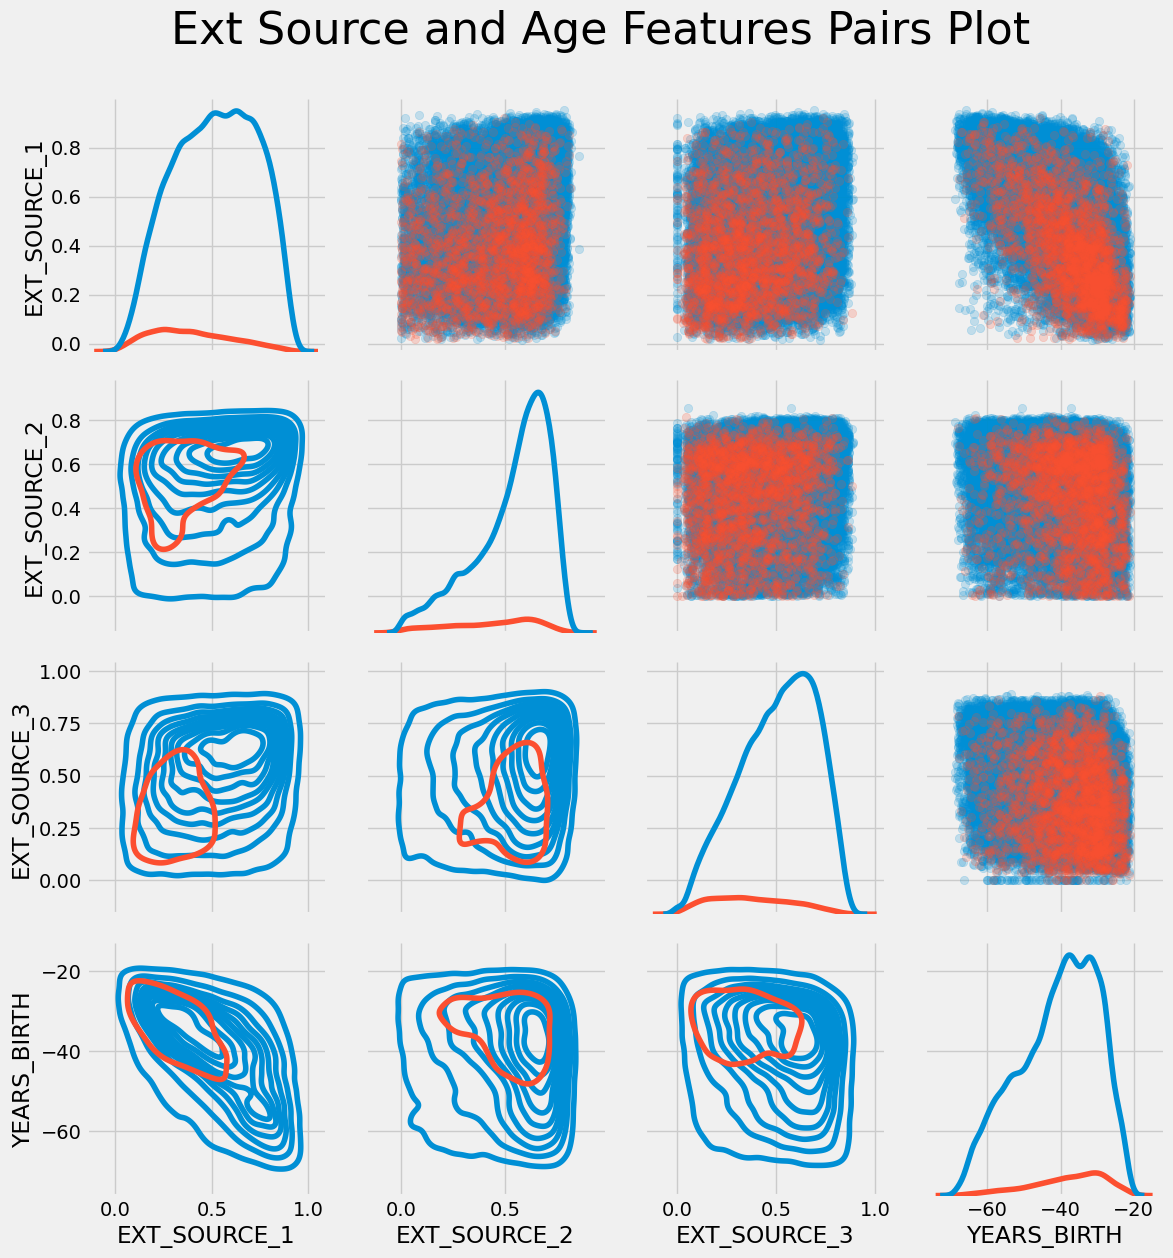

In [53]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle("Tracé des paires de caractéristiques de source externe et d'âge", size = 32, y = 1.05);

Dans ce graphique, le rouge indique les prêts qui n’ont pas été remboursés et le bleu les prêts remboursés. Il semble y avoir une relation linéaire négative modérée entre TYPE_Revenu et YEARS_BIRTH d'une part et d'autre part Nbr_ENfant et YEARS_BIRTH indiquant que ces fonctionnalités peuvent prendre en compte l'âge du client.

### Feature Engineering

Les compétitions Kaggle sont gagnées grâce à l'ingénierie des fonctionnalités : ceux qui gagnent sont ceux qui peuvent créer les fonctionnalités les plus utiles à partir des données. (Cela est vrai pour la plupart car les modèles gagnants, du moins pour les données structurées, ont tous tendance à être des variantes du boosting de gradient). Cela représente l’un des modèles de l’apprentissage automatique : l’ingénierie des fonctionnalités a un retour sur investissement supérieur à la création de modèles et au réglage des hyperparamètres. C'est un excellent article sur le sujet). Comme Andrew Ng aime le dire : « l’apprentissage automatique appliqué est essentiellement une ingénierie de fonctionnalités ».

Bien que le choix du bon modèle et des paramètres optimaux soit important, le modèle ne peut apprendre qu'à partir des données qui lui sont fournies. S'assurer que ces données sont aussi pertinentes que possible pour la tâche est le travail du data scientist (et peut-être de certains outils automatisés pour nous aider).

L'ingénierie des fonctionnalités fait référence à un processus général et peut impliquer à la fois la construction de fonctionnalités : l'ajout de nouvelles fonctionnalités à partir des données existantes, et la sélection de fonctionnalités : choisir uniquement les fonctionnalités les plus importantes ou d'autres méthodes de réduction de dimensionnalité. Il existe de nombreuses techniques que nous pouvons utiliser pour créer et sélectionner des fonctionnalités.

Nous ferons beaucoup d'ingénierie de fonctionnalités lorsque nous commencerons à utiliser les autres sources de données, mais dans ce cahier, nous essaierons uniquement deux méthodes simples de construction de fonctionnalités :

- Caractéristiques polynomiales

- Fonctionnalités de connaissance du domaine

### Caractéristiques polynomiales

Une méthode simple de construction de caractéristiques est appelée caractéristiques polynomiales. Dans cette méthode, nous créons des fonctionnalités qui sont des puissances de fonctionnalités existantes ainsi que des termes d'interaction entre fonctionnalités existantes. Par exemple, nous pouvons créer des variables EXT_SOURCE_1^2 et EXT_SOURCE_2^2 ainsi que des variables telles que EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, et ainsi de suite. Ces caractéristiques qui sont une combinaison de plusieurs variables individuelles sont appelées termes d'interaction car elles capturent les interactions entre les variables. En d’autres termes, même si deux variables en elles-mêmes peuvent ne pas avoir une forte influence sur la cible, leur combinaison en une seule variable d’interaction peut révéler une relation avec la cible. Les termes d'interaction sont couramment utilisés dans les modèles statistiques pour capturer les effets de plusieurs variables, mais je ne les vois pas utilisés aussi souvent dans l'apprentissage automatique. Néanmoins, nous pouvons en essayer quelques-uns pour voir s’ils pourraient aider notre modèle à prédire si un client remboursera ou non un prêt.

Jake VanderPlas écrit sur les fonctionnalités polynomiales dans son excellent livre Python for Data Science pour ceux qui souhaitent plus d'informations.

Dans le code suivant, nous créons des fonctionnalités polynomiales à l'aide des variables EXT_SOURCE et de la variable DAYS_BIRTH. Scikit-Learn possède une classe utile appelée PolynomialFeatures qui crée les polynômes et les termes d'interaction jusqu'à un degré spécifié. Nous pouvons utiliser un degré de 3 pour voir les résultats (lorsque nous créons des entités polynomiales, nous voulons éviter d'utiliser un degré trop élevé, à la fois parce que le nombre d'entités évolue de façon exponentielle avec le degré et parce que nous pouvons rencontrer des problèmes avec surapprentissage).

In [56]:
# Créer une nouvelle dataframe pour les fonctionnalités polynomiales
poly_features = data_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = data_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer pour gérer les valeurs manquantes
from sklearn.impute import SimpleImputer 
Simpleimputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Nécessité d'imputer les valeurs manquantes"
poly_features = Simpleimputer.fit_transform(poly_features)
poly_features_test = Simpleimputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Créer l'objet polynomial avec le degré spécifié
poly_transformer = PolynomialFeatures(degree = 3)

In [57]:
# Entraîner les caractéristiques polynomiales
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


Cela crée un nombre considérable de nouvelles fonctionnalités. Pour obtenir les noms, nous devons utiliser la méthode get_feature_names des fonctionnalités polynomiales.

In [58]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

Il existe 35 fonctionnalités avec des fonctionnalités individuelles élevées à des puissances allant jusqu'au degré 3 et des termes d'interaction. Nous pouvons désormais voir si l’une de ces nouvelles fonctionnalités est corrélée à la cible.

In [59]:
# Créer un dataframe des fonctionnalités
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 DAYS_BIRTH                 0.104882
EXT_SOURCE_3^2 DAYS_BIRTH               0.141777
EXT_SOURCE_2^2 DAYS_BIRTH               0.149313
EXT_SOURCE_3 DAYS_BIRTH                 0.150109
EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH    0.151816
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                   

Plusieurs des nouvelles variables ont une corrélation plus grande (en termes d’ampleur absolue) avec la cible que les caractéristiques originales. Lorsque nous construisons des modèles d'apprentissage automatique, nous pouvons essayer avec et sans ces fonctionnalités pour déterminer si elles aident réellement le modèle à apprendre.


Nous ajouterons ces fonctionnalités à une copie des données de formation et de test, puis évaluerons les modèles avec et sans les fonctionnalités. Souvent, dans l’apprentissage automatique, la seule façon de savoir si une approche fonctionnera est de l’essayer !

In [65]:
# Mettre les fonctionnalités de test dans le dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Fusionner les caractéristiques polynomiales dans la trame de données d'entraînement
poly_features['SK_ID_CURR'] = data_train['SK_ID_CURR']
app_train_poly = data_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Fusionner les fonctionnalités polnomiales dans la trame de données de test
poly_features_test['SK_ID_CURR'] = data_test['SK_ID_CURR']
app_test_poly = data_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
# Aligner les dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
# Imprimez les nouvelles formes
print("Les dimensions du dataframe d'entraînement avec des caractéristiques polynomiales :", app_train_poly.shape)
print('Les dimensions du dataframe de test avec des caractéristiques polynomiales : ', app_test_poly.shape)

Les dimensions du dataframe d'entraînement avec des caractéristiques polynomiales : (307511, 157)
Les dimensions du dataframe de test avec des caractéristiques polynomiales :  (48744, 157)


### Domain Knowledge Features

CREDIT_INCOME_PERCENT : le pourcentage du montant du crédit par rapport aux revenus d'un client
ANNUITY_INCOME_PERCENT : le pourcentage de la rente du prêt par rapport aux revenus d'un client
CREDIT_TERM : la durée du versement en mois (puisque la rente est le montant mensuel dû
DAYS_EMPLOYED_PERCENT : le pourcentage de jours employés par rapport à l'âge du client

In [66]:
app_train_domain = data_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_train_domain

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,False,2.007889,0.121978,0.060749,0.067329
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,False,4.790750,0.132217,0.027598,0.070862
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,False,2.000000,0.100000,0.050000,0.011814
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,False,2.316167,0.219900,0.094941,0.159905
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,False,4.222222,0.179963,0.042623,0.152418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,False,1.617143,0.174971,0.108198,0.025303
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,True,3.743750,0.166687,0.044524,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,0.0,1.0,0.0,1.0,False,4.429176,0.195941,0.044239,0.529266
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,False,2.164368,0.118158,0.054592,0.400134


In [67]:
app_test_domain = data_test.copy()
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
app_test_domain

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,False,4.213333,0.152300,0.036147,0.121044
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,3.0,False,2.250182,0.175455,0.077973,0.247398
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,1.0,4.0,False,3.275378,0.344578,0.105202,0.222477
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,3.0,False,5.000000,0.155614,0.031123,0.133515
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,False,3.475000,0.178150,0.051266,0.168021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0.0,0.0,0.0,0.0,1.0,False,3.395556,0.143815,0.042354,0.258838
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,NaN,NaN,NaN,NaN,NaN,False,3.951829,0.202600,0.051267,0.102718
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0.0,0.0,0.0,3.0,1.0,False,1.555556,0.163978,0.105414,0.190742
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0.0,0.0,0.0,0.0,2.0,False,2.000000,0.111680,0.055840,0.195518


Visualisez de nouvelles variables

Nous devrions explorer visuellement ces variables de connaissances du domaine dans un graphique. Pour tout cela, nous ferons le même tracé KDE coloré par la valeur de TARGET

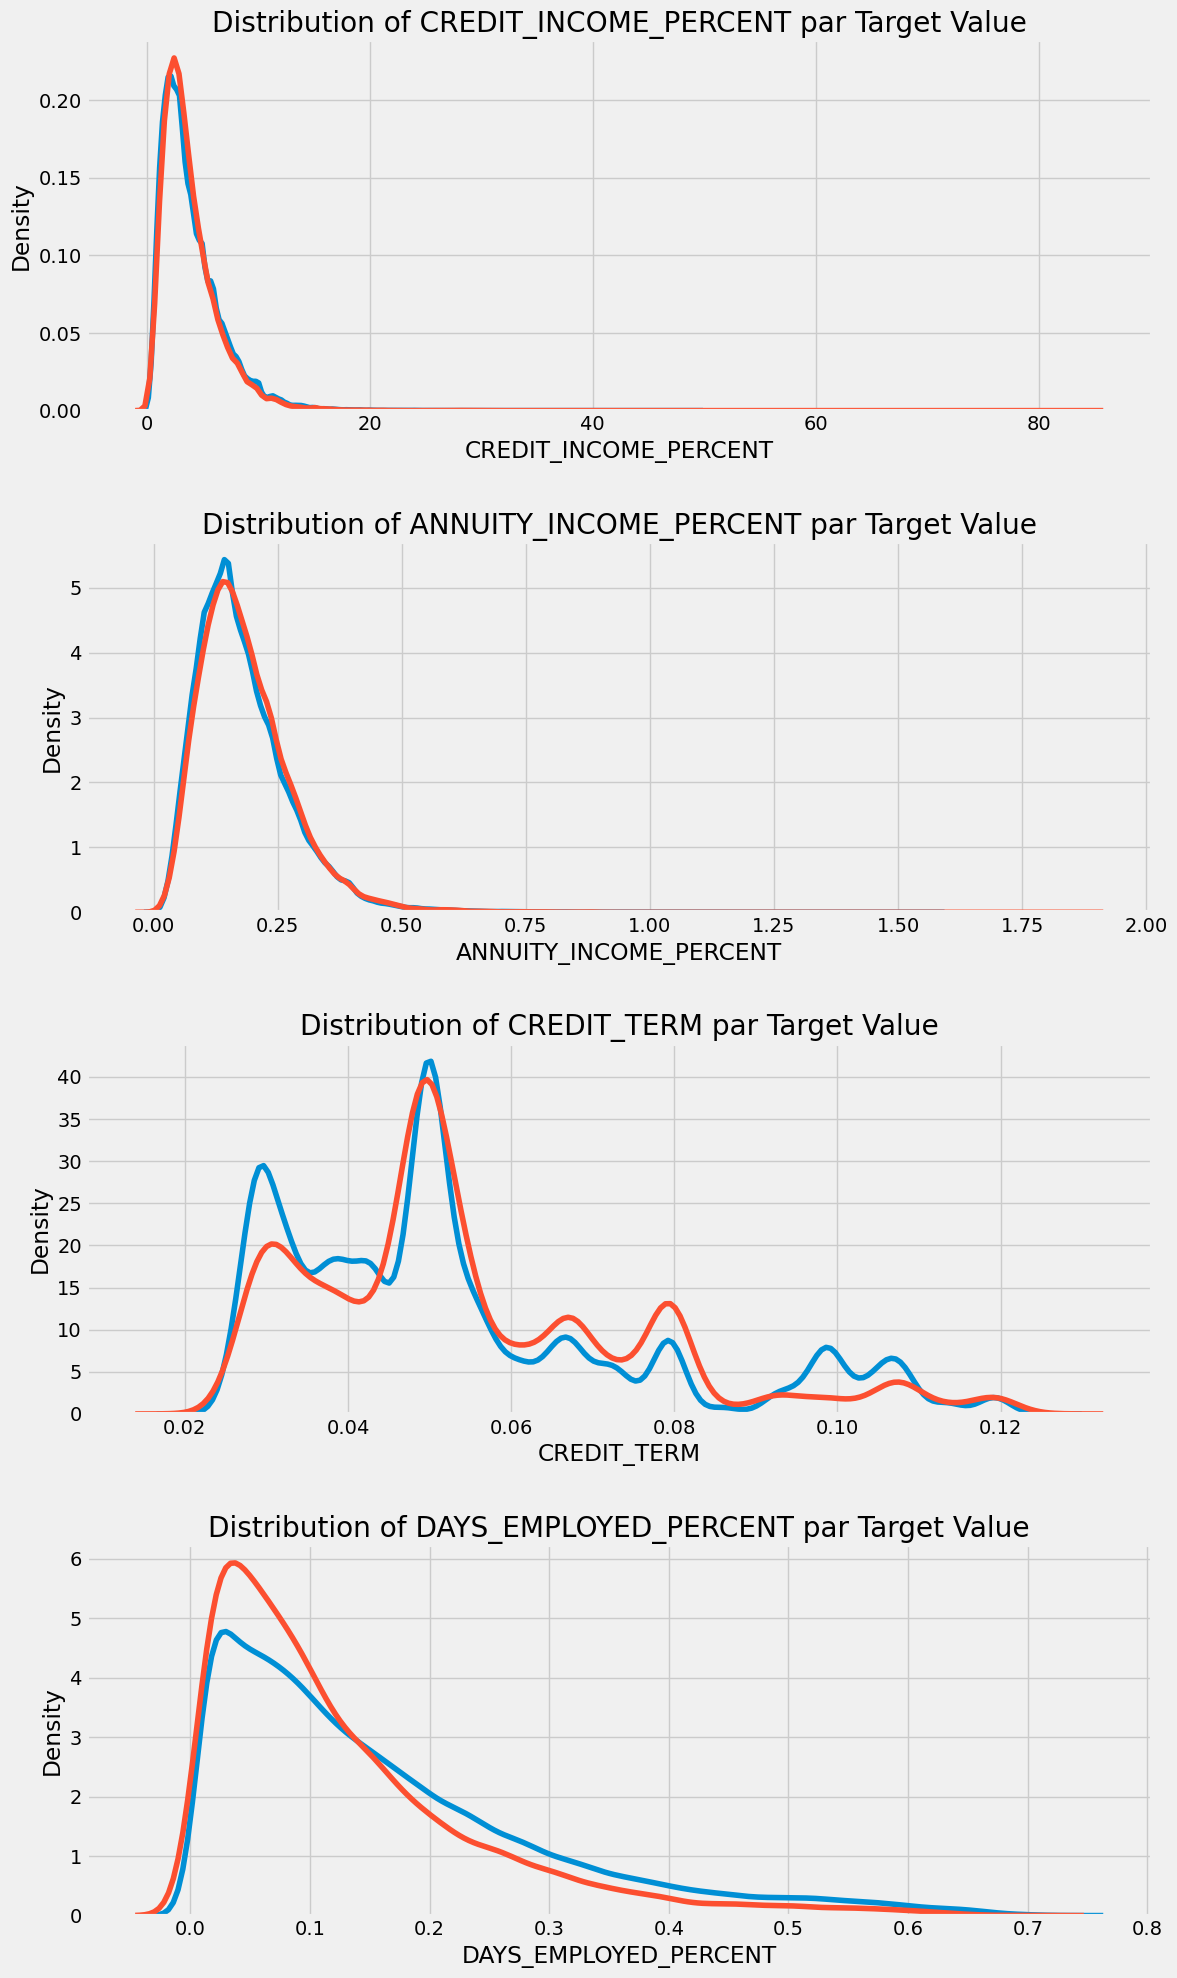

In [69]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s par Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

Difficile de dire à l’avance si ces nouvelles fonctionnalités seront utiles. La seule façon d’en être sûr est de les essayer !